# Task 1: Supervised learning

1) Go to https://archive.ics.uci.edu/ml/datasets/Census+Income and get the data for a binary classification task. Explore the data; study the variables, do a lot of visualizations, think and implement any feature engineering you might need, consider initial feature selections, and so on and so on.

In [2]:
import pandas as pd
import seaborn as sns
import sklearn.preprocessing as preprocessing

In [3]:
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_data = pd.read_csv('adult.data', names=headers)
test_data = pd.read_csv('adult.test', names=headers, skiprows=1)

In [4]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
test_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [8]:
encoder = preprocessing.LabelEncoder()
train_data['sex_dummy'] = encoder.fit_transform(train_data['sex'])
train_data['income_dummy'] = encoder.fit_transform(train_data['income'])
test_data['sex_dummy'] = encoder.fit_transform(test_data['sex'])
test_data['income_dummy'] = encoder.fit_transform(test_data['income'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f881f4f4630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f881ef91390>]], dtype=object)

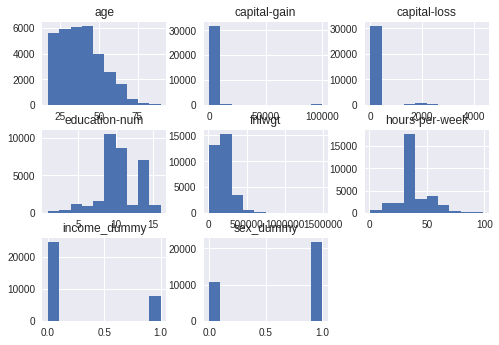

In [9]:
train_data.hist()

In [10]:
train_data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_dummy,income_dummy
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.088832,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,0.026858,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.012280,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.048480,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.045567,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229309,0.229689
sex_dummy,0.088832,0.026858,0.012280,0.048480,0.045567,0.229309,1.000000,0.215980
income_dummy,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,0.215980,1.000000


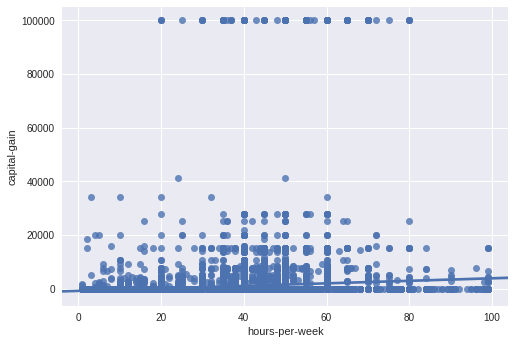

In [11]:
sns.regplot(y='capital-gain', x='hours-per-week', data=train_data)

2) After you have an insight of the data, build a machine learning model for the task with any algorithm of your choice. Fit the model, and evaluate its performance. Report at least accuracy (so that we can compare different solutions), but consider some other metrics too, and measure the performance with some other metric. You can choose the other metric freely, but please explain why you choose this metric, and explain briefly what this metric measures.

### Random forest

In [12]:
from sklearn.model_selection import train_test_split
x = train_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex_dummy']]
x_cv = test_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex_dummy']]
y = train_data['income_dummy']
y_cv = test_data['income_dummy']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.81636162633583098

In [14]:
rf.feature_importances_

array([ 0.20077803,  0.34672244,  0.13220535,  0.13383692,  0.04524409,
        0.10512478,  0.03608839])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, x_cv, y_cv)

array([ 0.81831583,  0.81721025,  0.81868436])

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[5632,  508],
       [ 987, 1014]])

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.92      0.88      6140
          1       0.67      0.51      0.58      2001

avg / total       0.81      0.82      0.81      8141



3) Iterate the process at least a few times. Study the predictions that the model provided; what went wrong, and why? Are there any common elements in the incorrect predictions? For example, a relation between some misclassification and certain input variable values?

In [18]:
x2 = train_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']]
x2_cv = test_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y)
rf2 = RandomForestClassifier()
rf2.fit(x2_train, y2_train)
y2_pred = rf2.predict(x2_test)
rf2.score(x2_test, y2_test)

0.79818204151824101

In [19]:
def print_results(rf, x_cv, y_cv, y_test, y_pred):
    print(rf.feature_importances_)
    print(cross_val_score(rf, x_cv, y_cv))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [20]:
print_results(rf2, x2_cv, y_cv, y_test, y2_pred)

[ 0.20935458  0.41659931  0.14738732  0.12292685  0.10373193]
[ 0.80191634  0.79620416  0.80007371]
[[5038 1102]
 [1646  355]]
             precision    recall  f1-score   support

          0       0.75      0.82      0.79      6140
          1       0.24      0.18      0.21      2001

avg / total       0.63      0.66      0.64      8141



4) Now that you have a nice framework to try out models, try some other algorithm(s) and see how well it/they performs. Which algorithm performs best and why? What are the major differences between the algorithms? Do you consider the choice of the algorithm as an important step in solving the task? Please answer this: are you happy with the results, and was this an easy task to solve?

### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.77570323056135615

In [22]:
cross_val_score(knn, x_cv, y_cv)

array([ 0.77704072,  0.77335544,  0.77114428])

In [23]:
y_pred_knn = knn.predict(x_test)
confusion_matrix(y_test, y_pred_knn)

array([[5688,  452],
       [1374,  627]])

In [24]:
print(classification_report(y_test, y_pred_knn))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86      6140
          1       0.58      0.31      0.41      2001

avg / total       0.75      0.78      0.75      8141



# Task 2: Unsupervised Machine Learning

1) Go to https://archive.ics.uci.edu/ml/datasets/Sponge and get the data for a clustering task. Explore the data; study the variables, do a lot of visualizations, think and implement any feature engineering you might need, consider initial feature selections, and so on and so on.

In [25]:
sponge_headers = ["A.CAPAS_DEL_CORTEX",
"A.CAPA_INTERNA_DEL_CORTEX",
"A.CORTEX",
"A.CORTEX_FIBROSO",
"A.CORTEX_SOLO_DE_ESPICULAS_TANGENCIALES",
"A.CUERPOS_EXTRANOS_EN_EL_CORTEX",
"A.GROSOR_DEL_CORTEX",
"A.HACES_DE_ESPICULAS_PRINCIPALES_EN_POMPON_EN_EL_CORTEX",
"A.TILOSTILOS_ADICIONALES_COANOSOMA",
"B.NUMERO_DE_TIPOS_DE_MEGASCLERAS",
"C.TIPO_ESPICULA_PRINCIPAL_DIACTINA_TUBERCULADA",
"C.TIPO_ESPICULA_PRINCIPAL_ESTILO",
"C.TIPO_ESPICULA_PRINCIPAL_ESTILOS_2_TAMANOS",
"C.TIPO_ESPICULA_PRINCIPAL_ESTILO_TILOSTILO",
"C.TIPO_ESPICULA_PRINCIPAL_ESTRONGILOXA",
"C.TIPO_ESPICULA_PRINCIPAL_OXAS",
"C.TIPO_ESPICULA_PRINCIPAL_TILOSTILO",
"D.ESPICULA_PRINCIPAL_ESTILO",
"D.ESPICULA_PRINCIPAL_TILOSTILO",
"D.FORMA_BASE_TILOSTILO_PRINCIPAL",
"E.DISPOSICION_MEGASCLERAS_ECTOSOMICAS_EN_EL_ECTOSOMA",
"E.FORMA_BASE_TILOSTILO_ECTOSOMICO",
"E.FORMA_MEGASCLERA_ECTOSOMICA",
"E.TIPO_MEGASCLERA_ECTOSOMICA",
"F.TIPO_DE_EXOSTILO",
"G.FORMA_MEGASCLERA_INTERMEDIARIA",
"G.TIPO_MEGASCLERA_INTERMEDIARIA",
"H.LONGITUD_MEGASCLERAS",
"I.MICROSCLERAS",
"I.TIPO_MICROSCLERA",
"J.ASTER",
"J.DIAMETRO_ESFERASTER",
"J.TIPO_DE_ASTER",
"J.TIPO_DE_DIPLASTER",
"J.TIPO_DE_ESFERASTER",
"K.FORMA_FINAL",
"L.NUMERO_DE_PAPILAS",
"L.PAPILAS",
"M.COLOR",
"N.SUPERFICIE",
"O.DISPOSICION_ESPICULAR_ESQUELETO",
"P.ALOJA_CANGREJO_ERMITANO",
"P.PERFORANTE",
"P.PSEUDORAICES",
"P.SUSTRATO"]
sponge_data = pd.read_csv('sponge.data', names=sponge_headers)
sponge_data.head()

,A.CAPAS_DEL_CORTEX,A.CAPA_INTERNA_DEL_CORTEX,A.CORTEX,A.CORTEX_FIBROSO,A.CORTEX_SOLO_DE_ESPICULAS_TANGENCIALES,A.CUERPOS_EXTRANOS_EN_EL_CORTEX,A.GROSOR_DEL_CORTEX,A.HACES_DE_ESPICULAS_PRINCIPALES_EN_POMPON_EN_EL_CORTEX,A.TILOSTILOS_ADICIONALES_COANOSOMA,B.NUMERO_DE_TIPOS_DE_MEGASCLERAS,...,K.FORMA_FINAL,L.NUMERO_DE_PAPILAS,L.PAPILAS,M.COLOR,N.SUPERFICIE,O.DISPOSICION_ESPICULAR_ESQUELETO,P.ALOJA_CANGREJO_ERMITANO,P.PERFORANTE,P.PSEUDORAICES,P.SUSTRATO
AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,SIN_TILOSTILOS_ADICIONALES,1_TIPO,...,MASIVO_IRREGULAR,0,NO,OTROS,RUGOSA,RADIAL,NO,NO,NO,DURO
ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,1_TIPO,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,1_TIPO,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,2_TIPOS,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,1_TIPO,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO


In [26]:
sponge_dummy = pd.get_dummies(sponge_data)
sponge_dummy.head()

,A.GROSOR_DEL_CORTEX,H.LONGITUD_MEGASCLERAS,L.NUMERO_DE_PAPILAS,A.CAPAS_DEL_CORTEX_1_CAPA,A.CAPAS_DEL_CORTEX_2_CAPAS,A.CAPAS_DEL_CORTEX_3_CAPAS,A.CAPAS_DEL_CORTEX_SIN_CORTEX,A.CAPA_INTERNA_DEL_CORTEX_BANDAS_DE_ESPICULAS_CRUZADAS,A.CAPA_INTERNA_DEL_CORTEX_MICROSCLERAS,A.CAPA_INTERNA_DEL_CORTEX_PERPENDICULAR,...,O.DISPOSICION_ESPICULAR_ESQUELETO_REDUCIDO,P.ALOJA_CANGREJO_ERMITANO_NO,P.ALOJA_CANGREJO_ERMITANO_SI,P.PERFORANTE_NO,P.PERFORANTE_SI,P.PSEUDORAICES_NO,P.PSEUDORAICES_SI,P.SUSTRATO_AMBOS,P.SUSTRATO_BLANDO,P.SUSTRATO_DURO
AAPTOS_AAPTOS,3,3,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
ALECTONA_MILLARI,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
CLIONA_CARTERI,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
CLIONA_CELATA,0,1,3,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
CLIONA_LABYRINTHICA,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1


2) Cluster the data with an algorithm of your choice. Try some parameters and see how the data clusters. Visualize the clustering output too (e.g. with scatter plots, using some variables as axis and cluster index as color), and observe the qualities of your clusters (sizes, shapes, et cetera).

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)  
kmeans.fit(sponge_dummy)
print(kmeans.labels_)  

[0 6 7 7 3 6 7 6 6 3 3 3 0 2 5 2 5 5 2 5 2 2 1 2 5 5 5 1 5 5 5 5 2 3 3 3 2
 3 3 5 1 5 3 3 3 3 1 5 5 0 6 6 0 1 3 3 3 8 8 3 1 1 3 4 4 6 6 6 6 6 1 2 1 1
 5 5]


In [ ]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
colors_palette = {0: 'red', 1: 'yellow', 2:'blue', 3:'green', 4: 'black', 5: 'brown', 6: 'pink', 7:'white', 8: 'grey'}
colors = [colors_palette[c] for c in kmeans.labels_]
scatter_matrix(sponge_dummy,figsize=[20,20],c=colors)



3) Iterate the process a few times. Measure the performance of your solution with some metric -- average silhouette width is fine -- and try to detect what improves your clustering performance. Regardless of your choice of metric, try to also analyze what your clusters actually mean. Notice that there might not be any "correct" answers, and interpreting the clusters might not make much sense. 

4) After you have results and intuition of the data for some clustering algorithm, try your luck with another approach.
